**Multiclass Obesity Prediction Model**

This notebook contains a machine learning model to classify individuals into obesity categories ie (underweight, normal, overweight and obese) as influenced by different variables such as weight, age, height, lifestyle and  health-related features.

There is further comparison in different clasification techniques(XGBoost, SVM and RandomForest) with neaural network model to gauge the best performing model with its regularizers and optimizers.

**Case Study and Implementation**

In [ ]:
#Imports of necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
klearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, log_loss, classification_report, confusion_matrix)
from tqdm import tqdm
import pickle
import joblib

**Problem Statement**

The rising obesity rates in Rwanda, driven by unhealthy dietary habits and rapid urbanization, have led to an increase in non-communicable diseases, accounting for 44% of the country’s mortality. With Kigali city showing a 43.6% obesity prevalence, there is an urgent need for an effective tool to predict obesity risk based on individual health and lifestyle data. This project aims to develop a machine learning model for early obesity risk prediction and better health management.

 **The Dataset**



I retrieved the data from Kaggle. [Kaggle Obesity Classification Model](https://www.kaggle.com/code/divyam6969/best-solution-multiclass-obesity-prediction)

Below is a brief description of the variables

id = Identifier for each individual in the dataset

Gender = [Male or Female]

Age = Individual's age in years

Weight = Individual's weight

Height =  individual's Height in metres

Health and Lifestyle Factors

Family_history_with_overweight = Whether the  family has history with overweight (Yes/No)

FAvC = 	Frequent consumption
of high calorie food. Indicates if the an individual frequently eats high-calorie food (Yes/No).

FCVC =	Frequency of
consumption of vegetables, how often a person eats vegetables

NCP =	Number of main meals, number of main meals a person takes per day

CAEC = (Consumption of Food Between Meals): How often the person snacks between meals (like "Sometimes", "Frequently", or "Always").

SMOKE = Whether the person smokes (Yes/No).

CH2O = (Daily Water Intake): How much water the person drinks daily

SCC = (Caloric Consumption Monitoring): Whether the person monitors their caloric intake (Yes/No).


FAF = (Physical Activity Frequency): How often the person exercises

TUE = (Time Using Technology Devices): How much time the person spends using electronic devices daily

CALC - (Alcohol Consumption): Frequency of alcohol consumption ("Never", "Sometimes", "Frequently").

MTRANS (Mode of Transportation): How the person usually gets around (like "Walking", "Public Transport", "Car")

Target Variable

NObeyesdad: The classification of the individual’s weight condition — categories : "Normal Weight", "Overweight", "Obesity Type I", "Obesity Type II



In [ ]:

data = pd.read_csv("/content/train.csv")
data.head(50)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
print(data.columns)

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [ ]:
data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
data.shape

(20758, 18)

In [ ]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0


In [ ]:


# Handle binary categorical columns
binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0, 'Male': 1, 'Female': 0})

# Handle ordinal categorical columns
ordinal_cols = ['CAEC', 'CALC']
ordinal_mappings = {
    'CAEC': {'Never': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'CALC': {'Never': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
}
for col, mapping in ordinal_mappings.items():
    data[col] = data[col].map(mapping)

# Apply One-Hot Encoding for MTRANS
data = pd.get_dummies(data, columns=['MTRANS'])

# Label Encoding for the target variable (NObeyesdad)
target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
data['NObeyesdad'] = data['NObeyesdad'].map(target_mapping)

# Check if any NaNs exist after mapping
data.fillna(0, inplace=True)  # Replace NaNs with 0

# Save the processed dataset
data.to_csv("processed_dataset.csv", index=False)

# Display first few rows
data.head(10)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1.0,...,0,0.000000,0.976473,1.0,3,False,False,False,True,False
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2.0,...,0,1.000000,1.000000,0.0,1,True,False,False,False,False
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1.0,...,0,0.866045,1.673584,0.0,0,False,False,False,True,False
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1.0,...,0,1.467863,0.780199,1.0,6,False,False,False,True,False
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1.0,...,0,1.967973,0.931721,1.0,3,False,False,False,True,False
5,5,1,18.128249,1.748524,51.552595,1,1,2.919751,3.000000,1.0,...,0,1.930033,1.000000,1.0,0,False,False,False,True,False
6,6,1,29.883021,1.754711,112.725005,1,1,1.991240,3.000000,1.0,...,0,0.000000,0.696948,1.0,5,True,False,False,False,False
7,7,1,29.891473,1.750150,118.206565,1,1,1.397468,3.000000,1.0,...,0,0.598655,0.000000,1.0,5,True,False,False,False,False
8,8,1,17.000000,1.700000,70.000000,0,1,2.000000,3.000000,1.0,...,1,1.000000,1.000000,0.0,2,False,False,False,True,False
9,9,0,26.000000,1.638836,111.275646,1,1,3.000000,3.000000,1.0,...,0,0.000000,0.218645,1.0,6,False,False,False,True,False


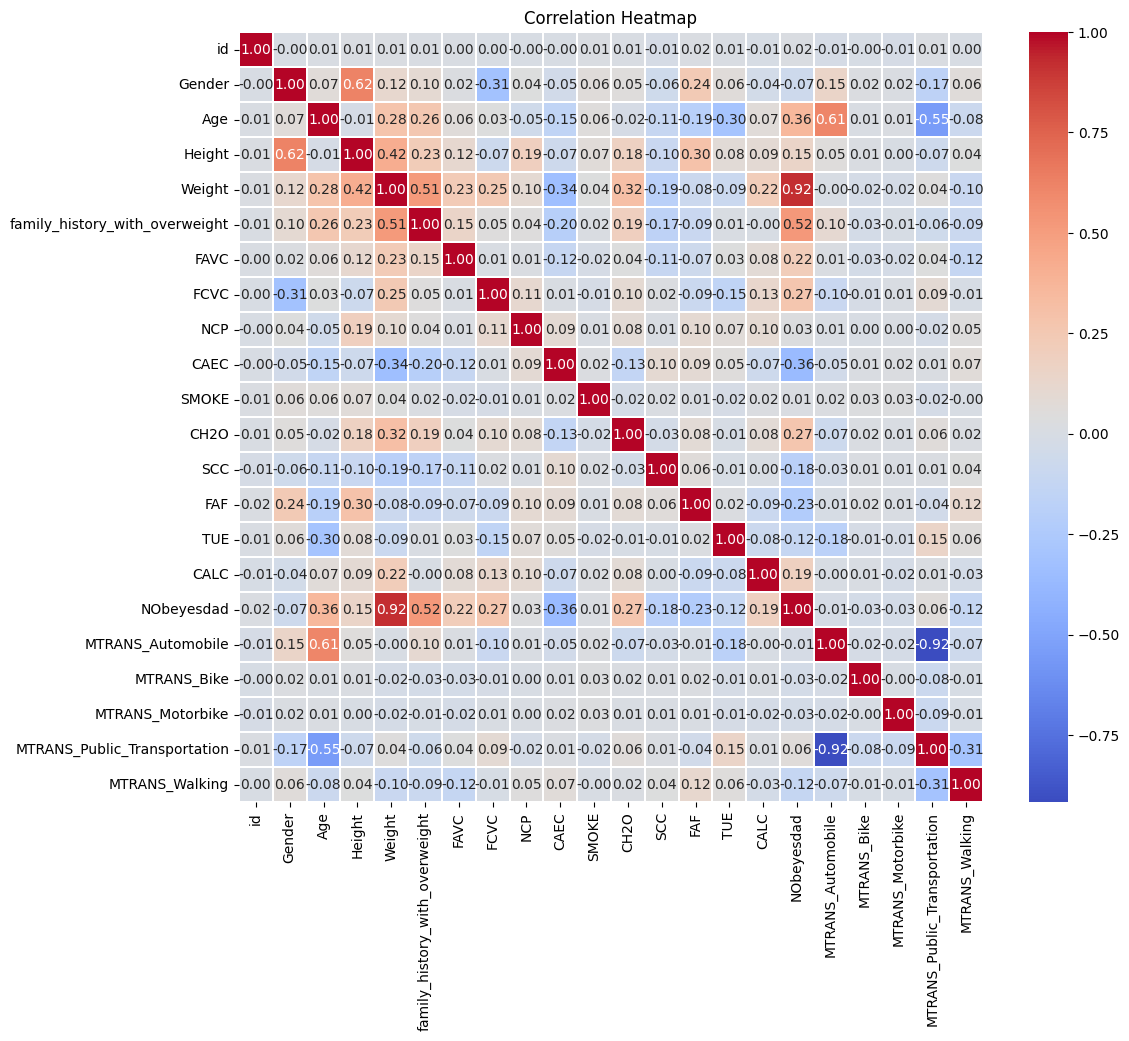

In [ ]:

# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.3)

# Title and labels
plt.title('Correlation Heatmap')
plt.show()


**Model Architecture:**

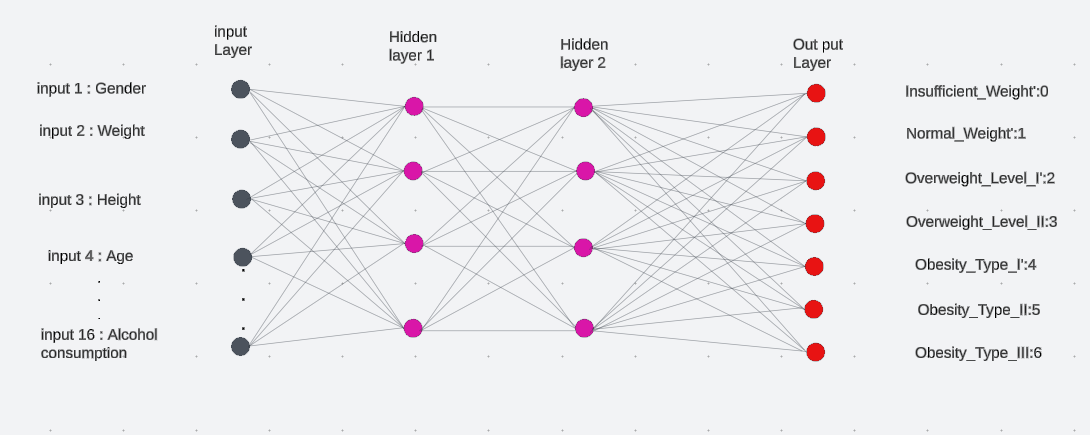

In [ ]:
# Split data
# Separate features (X) and target (y)
X = data.drop(columns=['NObeyesdad'])  # Features
y = data['NObeyesdad']  # Target variable (encoded)


# Convert y to categorical (one-hot encoding for TensorFlow)
y = keras.utils.to_categorical(y, num_classes=7)  # 7 obesity categories

# Splitting the data into training 70% test 15% validation 15%

# First split: 70% train, 30%  (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Split the 30% into 15% validation, 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Print dataset shapes
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Validation Set: {X_val.shape}, {y_val.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")

Training Set: (14530, 21), (14530, 7)
Validation Set: (3114, 21), (3114, 7)
Testing Set: (3114, 21), (3114, 7)


In [ ]:
print("Unique target classes:", np.unique(y))

Unique target classes: [0. 1.]


In [ ]:
print(X_train.isnull().sum())
print(X_train.dtypes)

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS_Automobile                 0
MTRANS_Bike                       0
MTRANS_Motorbike                  0
MTRANS_Public_Transportation      0
MTRANS_Walking                    0
dtype: int64
id                                  int64
Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_o

In [ ]:
# Normalize / Standardize the data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Selected Hyperparameters: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8}
[0]	validation_0-mlogloss:1.69142	validation_1-mlogloss:1.69489
[1]	validation_0-mlogloss:1.50569	validation_1-mlogloss:1.51337
[2]	validation_0-mlogloss:1.35779	validation_1-mlogloss:1.36794
[3]	validation_0-mlogloss:1.23446	validation_1-mlogloss:1.24756
[4]	validation_0-mlogloss:1.13289	validation_1-mlogloss:1.14887
[5]	validation_0-mlogloss:1.04613	validation_1-mlogloss:1.06516
[6]	validation_0-mlogloss:0.96931	validation_1-mlogloss:0.99087
[7]	validation_0-mlogloss:0.90112	validation_1-mlogloss:0.92506
[8]	validation_0-mlogloss:0.84043	validation_1-mlogloss:0.86676
[9]	validation_0-mlogloss:0.78710	validation_1-mlogloss:0.81587
[10]	validation_0-mlogloss:0.73938	validation_1-mlogloss:0.76987
[11]	validation_0-mlogloss:0.69724	validation_1-mlogloss:0.73003
[12]	validation_0-mlogloss:0.66030	validation_1-mlogloss:0.69512
[13]	validation_0-mlogloss:0.62621	val

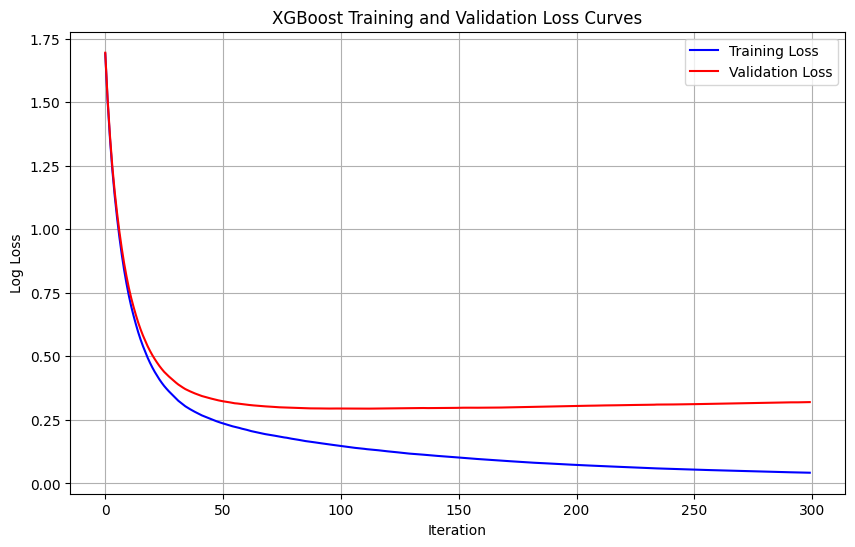


Validation Metrics:
XGBoost Validation Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
Log Loss: 0.3199

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       376
           1       0.86      0.90      0.88       441
           2       0.79      0.78      0.79       388
           3       0.79      0.80      0.80       377
           4       0.88      0.87      0.87       422
           5       0.96      0.97      0.97       509
           6       0.99      1.00      0.99       601

    accuracy                           0.90      3114
   macro avg       0.89      0.89      0.89      3114
weighted avg       0.90      0.90      0.90      3114



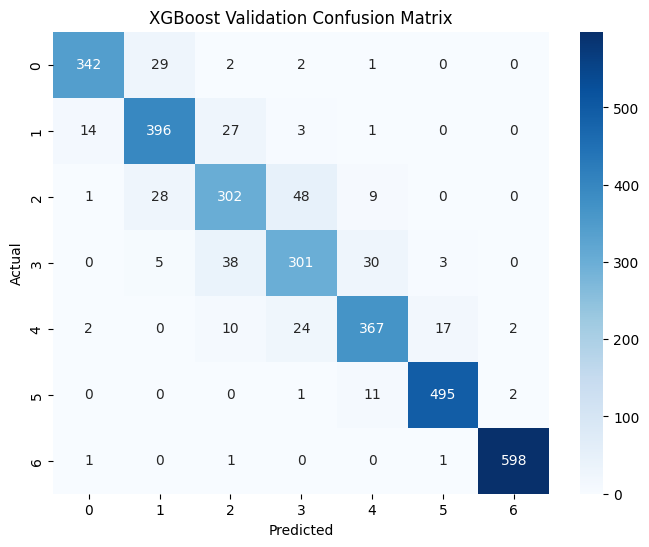


Test Metrics:
XGBoost Test Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
Log Loss: 0.2770

Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       379
           1       0.87      0.90      0.88       466
           2       0.80      0.82      0.81       345
           3       0.81      0.78      0.80       386
           4       0.87      0.88      0.87       436
           5       0.98      0.97      0.97       496
           6       1.00      1.00      1.00       606

    accuracy                           0.91      3114
   macro avg       0.90      0.89      0.90      3114
weighted avg       0.91      0.91      0.91      3114



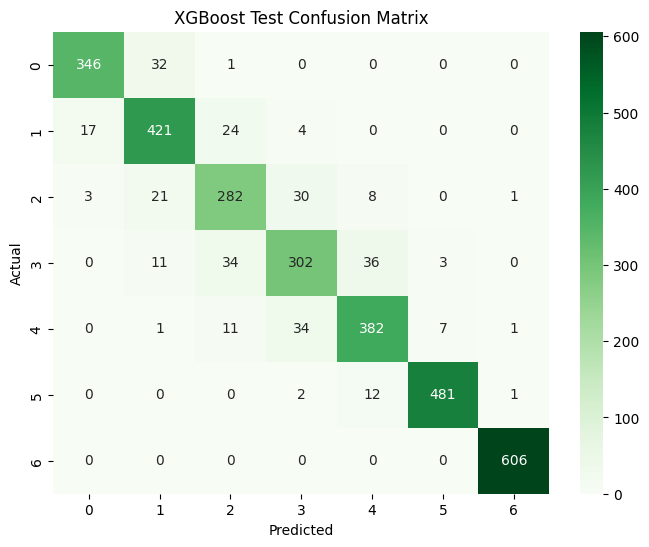

In [88]:
#XGBoost Model
def train_and_evaluate_xgb(X_train, y_train, X_val, y_val, X_test, y_test):
    # Hyperparameter grid
    param_grid = {
        'n_estimators': [100, 300],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6],
        'min_child_weight': [1, 5],
        'subsample': [0.8, 1.0]
    }

    #  model
    xgb_model = XGBClassifier(objective='multi:softprob', num_class=7, random_state=42)

    # Grid search for best hyperparameters
    grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

    # Did manual specified best parameters thou can be replaced by grid_searc
    selected_params = {
        'n_estimators': 300,
        'learning_rate': 0.1,
        'max_depth': 6,
        'min_child_weight': 1,
        'subsample': 0.8
    }

    print("Selected Hyperparameters:", selected_params)

    # Initializing the model with best parameters
    best_xgb = XGBClassifier(**selected_params, objective='multi:softprob', num_class=7, random_state=42)

    # Convert y_train back to original labels
    y_train_original = np.argmax(y_train, axis=1)
    y_val_original = np.argmax(y_val, axis=1)

    # Train the model with evaluation sets to track loss
    best_xgb.fit(
        X_train,
        y_train_original,
        eval_set=[(X_train, y_train_original), (X_val, y_val_original)],
        verbose=True
    )

    import pickle
    with open('xgboost_model.pkl', 'wb') as f:
        pickle.dump(best_xgb, f)
    print("\nModel saved as xgboost_model.pkl")




    # training history
    results = best_xgb.evals_result()

    # Plot for training and validation loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(results['validation_0']['mlogloss'], label='Training Loss', color='blue')
    plt.plot(results['validation_1']['mlogloss'], label='Validation Loss', color='red')
    plt.xlabel('Iteration')
    plt.ylabel('Log Loss')
    plt.title('XGBoost Training and Validation Loss Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Predict on validation set
    y_pred_xgb_val = best_xgb.predict(X_val)
    y_test_pred_xgb = best_xgb.predict(X_test)

    # Evaluation of the training set
    val_accuracy = accuracy_score(np.argmax(y_val, axis=1), y_pred_xgb_val)
    val_precision = precision_score(np.argmax(y_val, axis=1), y_pred_xgb_val, average='weighted')
    val_recall = recall_score(np.argmax(y_val, axis=1), y_pred_xgb_val, average='weighted')
    val_f1 = f1_score(np.argmax(y_val, axis=1), y_pred_xgb_val, average='weighted')
    val_loss = log_loss(y_val, best_xgb.predict_proba(X_val))

    print("\nValidation Metrics:")
    print(f"XGBoost Validation Accuracy: {val_accuracy:.2f}")
    print(f"Precision: {val_precision:.2f}")
    print(f"Recall: {val_recall:.2f}")
    print(f"F1 Score: {val_f1:.2f}")
    print(f"Log Loss: {val_loss:.4f}")
    print("\nValidation Classification Report:")
    print(classification_report(np.argmax(y_val, axis=1), y_pred_xgb_val))

    # Validation confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred_xgb_val)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('XGBoost Validation Confusion Matrix')
    plt.show()

    # Predict on test set
    y_pred_xgb_test = best_xgb.predict(X_test)

    # Evaluation for test set
    test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_xgb_test)
    test_precision = precision_score(np.argmax(y_test, axis=1), y_pred_xgb_test, average='weighted')
    test_recall = recall_score(np.argmax(y_test, axis=1), y_pred_xgb_test, average='weighted')
    test_f1 = f1_score(np.argmax(y_test, axis=1), y_pred_xgb_test, average='weighted')
    test_loss = log_loss(y_test, best_xgb.predict_proba(X_test))

    print("\nTest Metrics:")
    print(f"XGBoost Test Accuracy: {test_accuracy:.2f}")
    print(f"Precision: {test_precision:.2f}")
    print(f"Recall: {test_recall:.2f}")
    print(f"F1 Score: {test_f1:.2f}")
    print(f"Log Loss: {test_loss:.4f}")
    print("\nTest Classification Report:")
    print(classification_report(np.argmax(y_test, axis=1), y_pred_xgb_test))

    # Test confusion matrix
    plt.figure(figsize=(8, 6))
    cm_test = confusion_matrix(np.argmax(y_test, axis=1), y_pred_xgb_test)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('XGBoost Test Confusion Matrix')
    plt.show()

    return best_xgb

# Call the XGBoost function
model = train_and_evaluate_xgb(X_train, y_train, X_val, y_val, X_test, y_test)

Training SVM model and calculating losses...

Model saved as svm_model.pkl
Batch 10/146, Train Loss: 0.2657, Val Loss: 0.4000
Batch 20/146, Train Loss: 0.2521, Val Loss: 0.4000
Batch 30/146, Train Loss: 0.3993, Val Loss: 0.4000
Batch 40/146, Train Loss: 0.3001, Val Loss: 0.4000
Batch 50/146, Train Loss: 0.2816, Val Loss: 0.4000
Batch 60/146, Train Loss: 0.2999, Val Loss: 0.4000
Batch 70/146, Train Loss: 0.3054, Val Loss: 0.4000
Batch 80/146, Train Loss: 0.3964, Val Loss: 0.4000
Batch 90/146, Train Loss: 0.2758, Val Loss: 0.4000
Batch 100/146, Train Loss: 0.3254, Val Loss: 0.4000
Batch 110/146, Train Loss: 0.2731, Val Loss: 0.4000
Batch 120/146, Train Loss: 0.2715, Val Loss: 0.4000
Batch 130/146, Train Loss: 0.3299, Val Loss: 0.4000
Batch 140/146, Train Loss: 0.2643, Val Loss: 0.4000


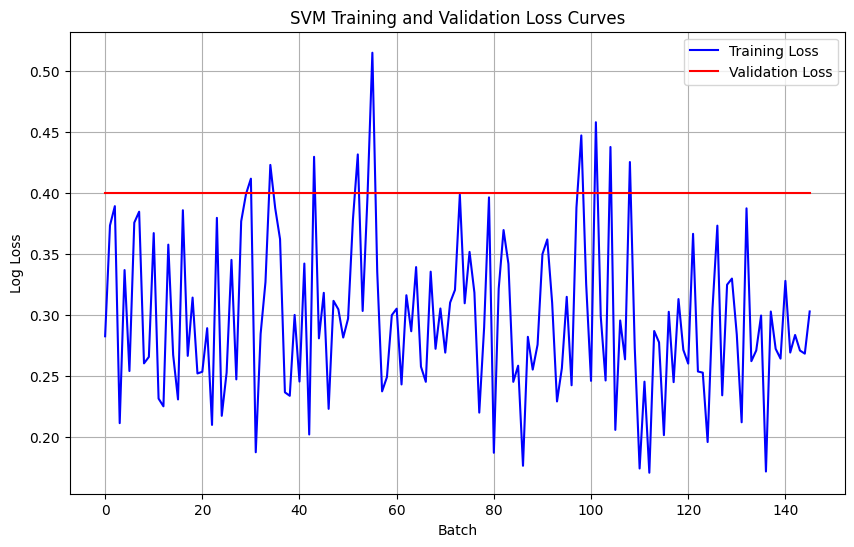


Validation Metrics:
SVM Validation Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86
Final Log Loss: 0.4000

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       376
           1       0.79      0.80      0.80       441
           2       0.67      0.72      0.69       388
           3       0.70      0.72      0.71       377
           4       0.88      0.80      0.84       422
           5       0.95      0.98      0.96       509
           6       1.00      1.00      1.00       601

    accuracy                           0.86      3114
   macro avg       0.84      0.84      0.84      3114
weighted avg       0.86      0.86      0.86      3114



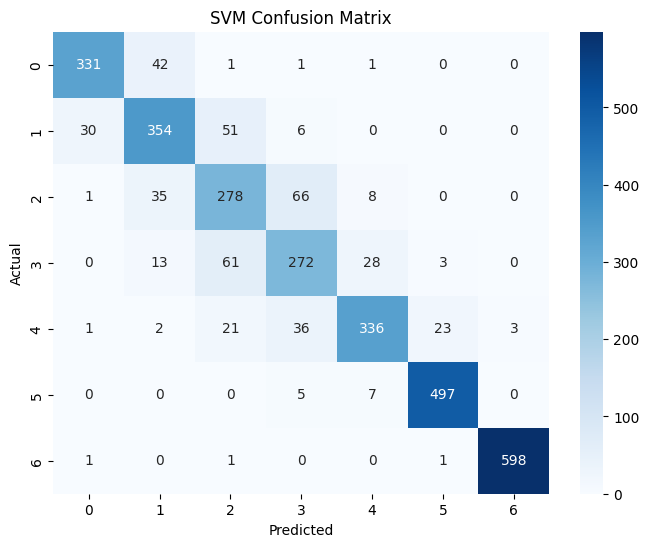

In [98]:
# # Support Vector Machine (SVM) Model
def train_and_evaluate_svm(X_train_scaled, y_train, X_val_scaled, y_val, batch_size=100):
    # Convert y_train to 1D array if it's one-hot encoded
    y_train_1d = np.argmax(y_train, axis=1)
    y_val_1d = np.argmax(y_val, axis=1)

    # Initialize SVM model
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True,
                    class_weight='balanced', decision_function_shape='ovr')

    # Lists to store loss values
    train_losses = []
    val_losses = []

    # Calculate number of batches
    n_batches = int(np.ceil(len(X_train_scaled) / batch_size))

    # Train the model in batches and track loss
    print("Training SVM model and calculating losses...")

    # First, fit the complete model
    svm_model.fit(X_train_scaled, y_train_1d)

    # saving the model
    import pickle
    with open('svm_model.pkl', 'wb') as f:
        pickle.dump(best_xgb, f)
    print("\nModel saved as svm_model.pkl")

    # Then calculate losses for visualization

    # For training data
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(X_train_scaled))

        X_batch = X_train_scaled[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]

        # Get probabilities for current batch
        y_pred_proba = svm_model.predict_proba(X_batch)

        # Calculate and store loss
        batch_loss = log_loss(y_batch, y_pred_proba)
        train_losses.append(batch_loss)

        # Calculate validation loss
        val_pred_proba = svm_model.predict_proba(X_val_scaled)
        val_loss = log_loss(y_val, val_pred_proba)
        val_losses.append(val_loss)

        if (i + 1) % 10 == 0:
            print(f"Batch {i+1}/{n_batches}, Train Loss: {batch_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Plot the loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss', color='blue')
    plt.plot(val_losses, label='Validation Loss', color='red')
    plt.xlabel('Batch')
    plt.ylabel('Log Loss')
    plt.title('SVM Training and Validation Loss Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Get predictions
    y_pred_svm = svm_model.predict(X_val_scaled)
    y_pred_svm_proba = svm_model.predict_proba(X_val_scaled)

    # Convert predictions to one-hot encoding for evaluation
    y_pred_svm_onehot = keras.utils.to_categorical(y_pred_svm, num_classes=7)

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred_svm_onehot)
    precision = precision_score(y_val, y_pred_svm_onehot, average='weighted')
    recall = recall_score(y_val, y_pred_svm_onehot, average='weighted')
    f1 = f1_score(y_val, y_pred_svm_onehot, average='weighted')
    val_loss = log_loss(y_val, y_pred_svm_proba)

    # Print metrics
    print("\nValidation Metrics:")
    print(f"SVM Validation Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Final Log Loss: {val_loss:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_val_1d, y_pred_svm))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_val_1d, y_pred_svm)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('SVM Confusion Matrix')
    plt.show()

    return svm_model

# Call the SVM function
model = train_and_evaluate_svm(X_train_scaled, y_train, X_val_scaled, y_val)

Training Random Forest and calculating losses...


100%|██████████| 20/20 [00:58<00:00,  2.92s/it]



Training final model with all trees...

Model saved as rf_model.pkl


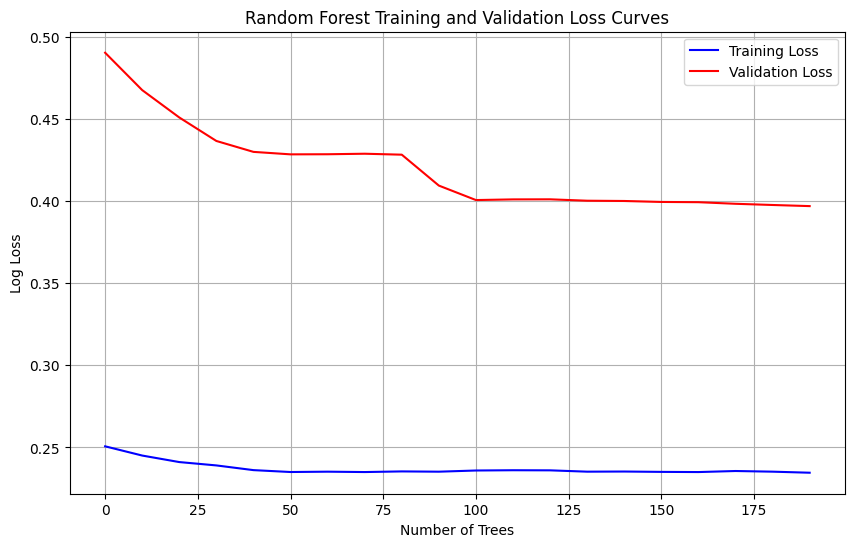


Validation Metrics:
Random Forest Validation Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
Log Loss: 0.3968

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       376
           1       0.79      0.89      0.84       441
           2       0.79      0.72      0.75       388
           3       0.78      0.81      0.79       377
           4       0.89      0.86      0.87       422
           5       0.96      0.98      0.97       509
           6       1.00      1.00      1.00       601

    accuracy                           0.89      3114
   macro avg       0.88      0.88      0.88      3114
weighted avg       0.89      0.89      0.89      3114



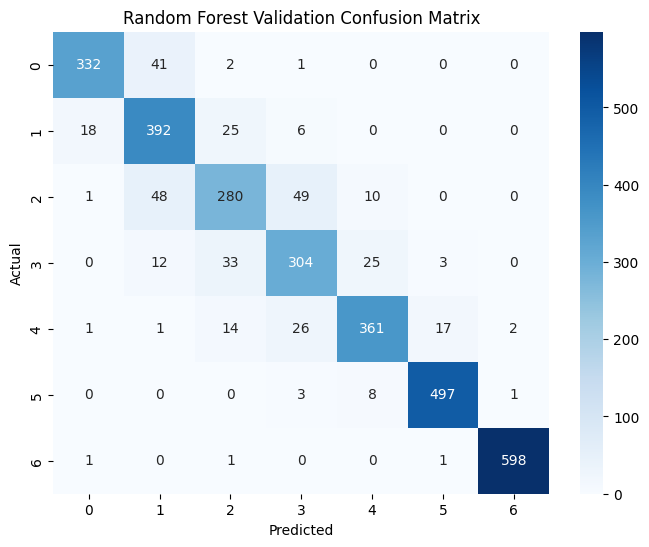


Test Metrics:
Random Forest Test Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
Log Loss: 0.3785

Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       379
           1       0.82      0.90      0.86       466
           2       0.79      0.73      0.76       345
           3       0.80      0.80      0.80       386
           4       0.89      0.86      0.88       436
           5       0.97      0.98      0.98       496
           6       1.00      1.00      1.00       606

    accuracy                           0.90      3114
   macro avg       0.89      0.88      0.89      3114
weighted avg       0.90      0.90      0.90      3114



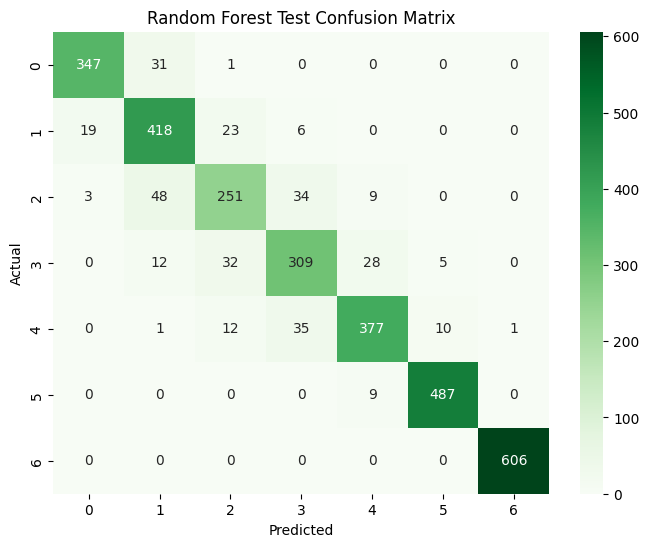

In [99]:

# RandomForest Model

def train_and_evaluate_rf(X_train, y_train, X_val, y_val, X_test, y_test):
    # Convert one-hot encoded labels to 1D arrays if needed
    if len(y_train.shape) > 1:
        y_train_1d = np.argmax(y_train, axis=1)
        y_val_1d = np.argmax(y_val, axis=1)
        y_test_1d = np.argmax(y_test, axis=1)
    else:
        y_train_1d = y_train
        y_val_1d = y_val
        y_test_1d = y_test

    # Initialize Random Forest model
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        random_state=42,
        verbose=0
    )

    # Lists to store losses
    train_losses = []
    val_losses = []

    # Train the model incrementally to track loss
    print("Training Random Forest and calculating losses...")

    # Below is a series of partial forests to track learning progress

    n_steps = 20  # Number of points to plot in the loss curve
    trees_per_step = rf_model.n_estimators // n_steps

    for i in tqdm(range(1, n_steps + 1)):
        # Train a partial forest
        temp_rf = RandomForestClassifier(
            n_estimators=trees_per_step * i,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            bootstrap=True,
            random_state=42,
            verbose=0
        )

        temp_rf.fit(X_train, y_train_1d)

        # Calculate and store training loss
        train_proba = temp_rf.predict_proba(X_train)
        train_loss = log_loss(y_train, train_proba)
        train_losses.append(train_loss)

        # Calculate and store validation loss
        val_proba = temp_rf.predict_proba(X_val)
        val_loss = log_loss(y_val, val_proba)
        val_losses.append(val_loss)

    # Train the final model with all trees
    print("\nTraining final model with all trees...")
    rf_model.fit(X_train, y_train_1d)

    import pickle
    with open('rf_model.pkl', 'wb') as f:
        pickle.dump(rf_model, f)
    print("\nModel saved as rf_model.pkl")

    # Plot the loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(train_losses)) * trees_per_step, train_losses,
             label='Training Loss', color='blue')
    plt.plot(np.arange(len(val_losses)) * trees_per_step, val_losses,
             label='Validation Loss', color='red')
    plt.xlabel('Number of Trees')
    plt.ylabel('Log Loss')
    plt.title('Random Forest Training and Validation Loss Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Validation predictions and metrics
    print("\nValidation Metrics:")
    y_pred_rf_val = rf_model.predict(X_val)
    val_proba = rf_model.predict_proba(X_val)

    val_accuracy = accuracy_score(y_val_1d, y_pred_rf_val)
    val_precision = precision_score(y_val_1d, y_pred_rf_val, average='weighted')
    val_recall = recall_score(y_val_1d, y_pred_rf_val, average='weighted')
    val_f1 = f1_score(y_val_1d, y_pred_rf_val, average='weighted')
    val_loss = log_loss(y_val, val_proba)

    print(f"Random Forest Validation Accuracy: {val_accuracy:.2f}")
    print(f"Precision: {val_precision:.2f}")
    print(f"Recall: {val_recall:.2f}")
    print(f"F1 Score: {val_f1:.2f}")
    print(f"Log Loss: {val_loss:.4f}")
    print("\nValidation Classification Report:")
    print(classification_report(y_val_1d, y_pred_rf_val))

    # Plot validation confusion matrix
    plt.figure(figsize=(8, 6))
    cm_val = confusion_matrix(y_val_1d, y_pred_rf_val)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Random Forest Validation Confusion Matrix')
    plt.show()

    # Test predictions and metrics
    print("\nTest Metrics:")
    y_pred_rf_test = rf_model.predict(X_test)
    test_proba = rf_model.predict_proba(X_test)

    test_accuracy = accuracy_score(y_test_1d, y_pred_rf_test)
    test_precision = precision_score(y_test_1d, y_pred_rf_test, average='weighted')
    test_recall = recall_score(y_test_1d, y_pred_rf_test, average='weighted')
    test_f1 = f1_score(y_test_1d, y_pred_rf_test, average='weighted')
    test_loss = log_loss(y_test, test_proba)

    print(f"Random Forest Test Accuracy: {test_accuracy:.2f}")
    print(f"Precision: {test_precision:.2f}")
    print(f"Recall: {test_recall:.2f}")
    print(f"F1 Score: {test_f1:.2f}")
    print(f"Log Loss: {test_loss:.4f}")
    print("\nTest Classification Report:")
    print(classification_report(y_test_1d, y_pred_rf_test))

    # Plot test confusion matrix
    plt.figure(figsize=(8, 6))
    cm_test = confusion_matrix(y_test_1d, y_pred_rf_test)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Random Forest Test Confusion Matrix')
    plt.show()

    return rf_model

# Call the Random Forest function
model = train_and_evaluate_rf(X_train, y_train, X_val, y_val, X_test, y_test)

Training Neural Network...
Epoch 1/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3832 - loss: 1.6693 - val_accuracy: 0.6715 - val_loss: 0.9018
Epoch 2/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6538 - loss: 0.9007 - val_accuracy: 0.7373 - val_loss: 0.6989
Epoch 3/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7117 - loss: 0.7451 - val_accuracy: 0.7848 - val_loss: 0.6000
Epoch 4/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7433 - loss: 0.6540 - val_accuracy: 0.8064 - val_loss: 0.5346
Epoch 5/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7645 - loss: 0.5965 - val_accuracy: 0.8224 - val_loss: 0.4934
Epoch 6/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7889 - loss: 0.5439 - val_accuracy: 0.8301 - val_loss: 0.4664
Epoch 7/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8023 - loss: 0.5208 - val_accuracy: 0.8420 - val_loss: 0.4459
Epoch 8/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8031 - loss

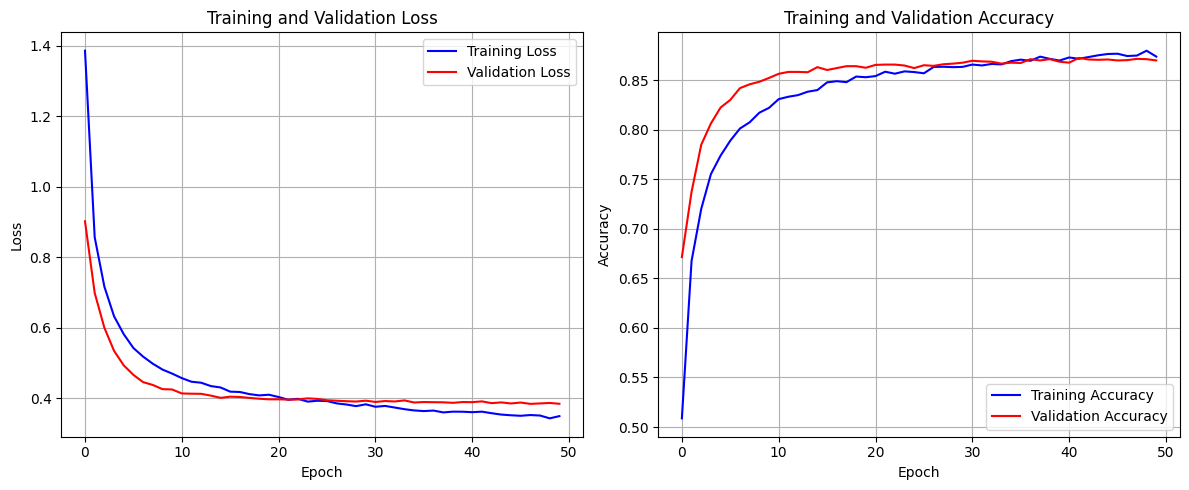

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Validation Metrics:
Deep Learning Validation Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87
Loss: 0.3844

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       376
           1       0.79      0.84      0.82       441
           2       0.75      0.70      0.72       388
           3       0.75      0.73      0.74       377
           4       0.86      0.86      0.86       422
           5       0.95      0.98      0.96       509
           6       1.00      1.00      1.00       601

    accuracy                           0.87      3114
   macro avg       0.86      0.86      0.86      3114
weighted avg       0.87      0.87      0.87      3114



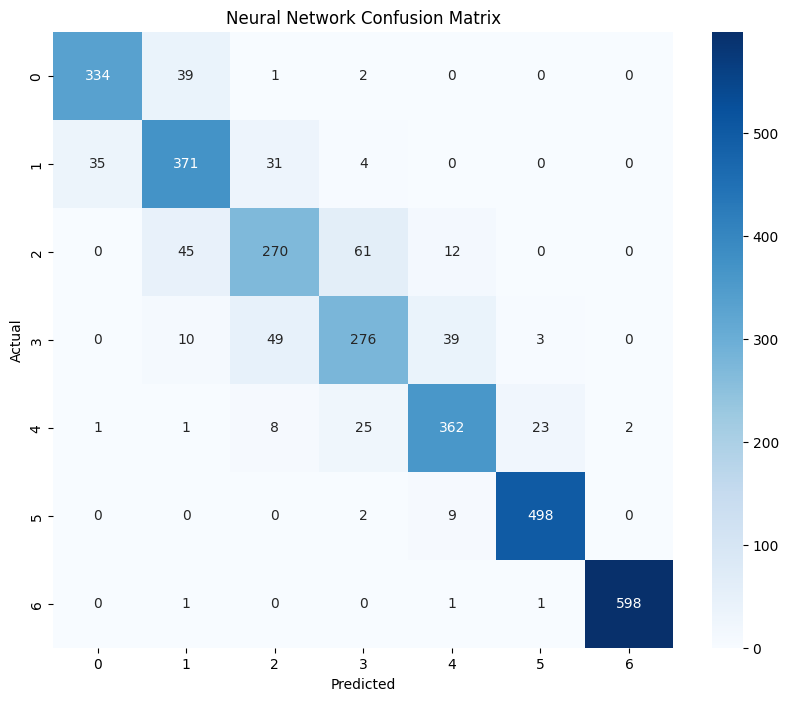

In [100]:
# Neural Network Model

def define_and_train_model(X_train_scaled, y_train, X_val_scaled, y_val,
                          optimization='Adam', regularization_datatype=None,
                          early_stopping=True, dropout=0.3, learning_rate=0.0001):

    # Build the model
    model = Sequential([
        Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(dropout),
        Dense(128, activation='relu'),
        Dropout(dropout),
        Dense(32, activation='relu'),
        Dense(7, activation='softmax')
    ])

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    # Train the model and store history

    print("Training Neural Network...")
    history = model.fit(X_train_scaled, y_train,
                       validation_data=(X_val_scaled, y_val),
                       epochs=50, batch_size=32, verbose=1)
    import pickle
    with open('NN_model.pkl', 'wb') as f:
        pickle.dump(best_xgb, f)
    print("\nModel saved as NN_model.pkl")
    # Plot training history
    plt.figure(figsize=(12, 5))

    # Plot loss curves
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)

    # Plot accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Get predictions
    y_pred = model.predict(X_val_scaled)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_val, axis=1)

    # Calculate metrics
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')

    # Evaluate on validation set
    loss, accuracy = model.evaluate(X_val_scaled, y_val, verbose=0)

    # Print metrics
    print("\nValidation Metrics:")
    print(f"Deep Learning Validation Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Loss: {loss:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes))

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Neural Network Confusion Matrix')
    plt.show()

    return model, history

# Call the function
model, history = define_and_train_model(X_train_scaled, y_train, X_val_scaled, y_val)

In [107]:
#Load and Make Predictions

# BMI Classification mapping
BMI_CLASSES = {
    0: 'Insufficient_Weight',   # Less than 18.5
    1: 'Normal_Weight',        # 18.5 to 24.9
    2: 'Overweight_Level_I',   # 25 to 27.49
    3: 'Overweight_Level_II',  # 27.5 to 29.9
    4: 'Obesity_Type_I',       # 30.0 to 34.9
    5: 'Obesity_Type_II',      # 35.0 to 39.9
    6: 'Obesity_Type_III'      # Higher than 40
}

def load_models(*filenames):
    """Load multiple trained models """
    models = {}
    for filename in filenames:
        try:
            models[filename] = joblib.load(filename)
            print(f"Successfully loaded {filename}")
        except Exception as e:
            print(f"Failed to load {filename}: {e}")
    return models

def predict_with_models(models, features):
    """Make predictions using multiple models"""
    if len(features) != 21:
        raise ValueError(f"Models expect 21 features, but got {len(features)}")

    features = np.array(features).reshape(1, -1)
    results = {}

    for model_name, model in models.items():
        try:
            prediction = model.predict(features)[0]
            probability = model.predict_proba(features)[0]

            results[model_name] = {
                'predicted_class': BMI_CLASSES[prediction],
                'class_number': int(prediction),
                'confidence': float(max(probability) * 100)
            }
        except Exception as e:
            print(f"Prediction failed for {model_name}: {e}")

    return results

def display_predictions(results):
    """Display predictions from all models"""
    print("\nPredictions from all models:")
    print("-" * 50)
    for model_name, result in results.items():
        print(f"\nModel: {model_name}")
        print(f"Predicted BMI Class: {result['predicted_class']}")
        print(f"Confidence: {result['confidence']:.2f}%")
        print("-" * 30)

if __name__ == "__main__":
    try:
        # Load all available models
        model_files = ['xgboost_model.pkl', 'NN_model.pkl', 'rf_model.pkl', 'svm_model.pkl']
        models = load_models(*model_files)

        if not models:
            raise FileNotFoundError("No models could be loaded")

        # Example features
        sample_features = [1, 25, 170, 70, 1, 1, 2, 3, 1, 0, 2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0]

        # Make predictions with all models
        results = predict_with_models(models, sample_features)

        # Display results
        display_predictions(results)

    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"Error occurred: {str(e)}")


Successfully loaded xgboost_model.pkl
Successfully loaded NN_model.pkl
Successfully loaded rf_model.pkl
Successfully loaded svm_model.pkl

Predictions from all models:
--------------------------------------------------

Model: xgboost_model.pkl
Predicted BMI Class: Overweight_Level_I
Confidence: 36.98%
------------------------------

Model: NN_model.pkl
Predicted BMI Class: Overweight_Level_I
Confidence: 36.98%
------------------------------

Model: rf_model.pkl
Predicted BMI Class: Normal_Weight
Confidence: 32.61%
------------------------------

Model: svm_model.pkl
Predicted BMI Class: Overweight_Level_I
Confidence: 36.98%
------------------------------
